# MO1 Aggregate 1 Label 451

In [1]:
import load_stl
import meshio
import os.path
import sys
import vtk
from vtk.util.numpy_support import vtk_to_numpy
import numpy as np
import basic_functions as bf
import test_image_ellipsoid as tie
import bounding_box as bbox
import plot
import included_ellipsoid as ie
import bounding_ellipsoid as be
import scipy as scipy
from scipy import optimize
from scipy.optimize import minimize
from scipy.special import ellipkinc, ellipeinc
from importlib import reload
import indicators_calculation as ic

## 1) Load aggregate

In [2]:
load_stl.load_aggregate('C:\\Users\\dschmidt\\Documents\\GitHub\\Cuttings\\MO1_Agg1_Label451.stl')

Number of points: 829301
Number of elements:
  triangle: 1667740

In [3]:
reader = vtk.vtkGenericDataObjectReader()
reader.SetFileName('MO1_Agg1_Label451.vtk')
reader.Update()

aggregate_coord = np.array(reader.GetOutput().GetPoints().GetData())
print(aggregate_coord)
aggregate_coord = aggregate_coord - bf.compute_center(aggregate_coord)

[[0.016892 0.018146 0.014785]
 [0.016877 0.018152 0.014785]
 [0.016892 0.018152 0.014784]
 ...
 [0.014083 0.018873 0.020982]
 [0.014065 0.018891 0.020981]
 [0.014083 0.018891 0.020981]]


In [4]:
print(aggregate_coord.shape)

(829301, 3)


## 2) Bounding box

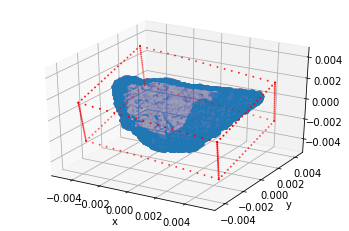

In [5]:
reload(plot)
bbox_aggregate = bbox.bbox_optim(aggregate_coord)
plot.bbox_plot(aggregate_coord, bbox_aggregate)

In [6]:
print(bbox_aggregate)

{'angles': array([ 0.36705572, -0.19190982]), 'volume': 3.326906201333768e-07}


## 3) Bounding ellipsoid

In [7]:
bounding_ellipsoid = be.bounding_ellipsoid_optim(aggregate_coord, 1e-13)

In [8]:
print(bounding_ellipsoid)

{'volume': 5.610571368712402e-07, 'a': 0.006817470367416906, 'b': 0.004919907643622603, 'c': 0.003993358245356, 'bbox': {'angles': array([ 0.36705572, -0.19190982]), 'volume': 3.326906201333768e-07}}


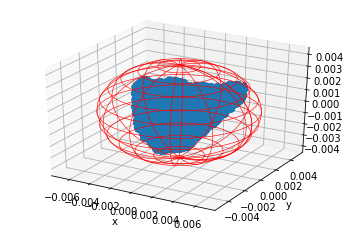

In [9]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid, 0.0001)

## 4) Included ellipsoid

In [10]:
included_ellipsoid = ie.included_ellipsoid_optim(aggregate_coord, 1e-13)

In [16]:
print(included_ellipsoid)

{'volume': 1.4609294363996254e-08, 'a': 0.002020678908908451, 'b': 0.0014582466917289223, 'c': 0.001183620074195338, 'bbox': {'angles': array([ 0.36705572, -0.19190982]), 'volume': 3.326906201333768e-07}}


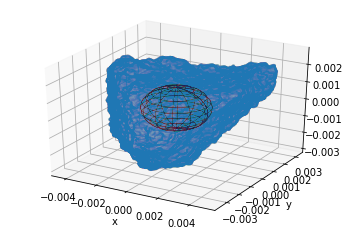

In [17]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid, 0.0001)

## 5) Middle ellipsoid

In [11]:
middle_ellipsoid = bf.mid_ellipsoid(bounding_ellipsoid, included_ellipsoid)

In [19]:
print(middle_ellipsoid)

{'volume': 1.5280280439221726e-07, 'a': 0.004419074638162678, 'b': 0.003189077167675763, 'c': 0.002588489159775669}


## 6) Indicators

In [5]:
reload(bf)
reload(ic)
reload(plot)

<module 'plot' from 'C:\\Users\\dschmidt\\Documents\\Cuttings\\plot.py'>

In [12]:
distance = ic.roughness_distance(aggregate_coord, middle_ellipsoid)

In [13]:
tomo_surface = 0.00018040017
tomo_volume = 1.2837589e-007

Aggregate standard sphericity =  0.6821860385652285
Bounding box and ellispoids ratios :
a/b = 1.3856907204861875
a/c = 1.7072022965495652
b/c = 1.2320226088766557
a^2/bc = 2.365654380321441
Bounding ellipsoid surface / Included ellipsoid surface = 11.382873274777351
Aggregate tomographed surface / Bounding ellipsoid surface = 0.5283886770932618
Aggregate tomographed surface / Middle ellipsoid surface = 1.2575849942329047
Aggregate tomographed surface / Included ellipsoid surface = 6.014581351179849
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.0004417657787007853
 
data min max
theta 0.00021019514348568505 6.283155368442306
phi 0.0011546089248821486 3.1407815598394215
alpha 0.0002912654558723831 6.283143821349165
beta 0.0007934570846738053 3.1411167446086865
distance -0.0016172277746293773 0.0017772275187891524


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

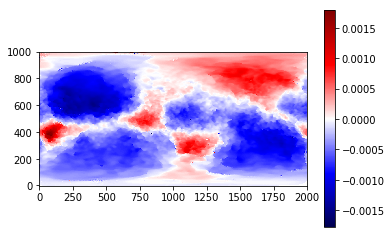

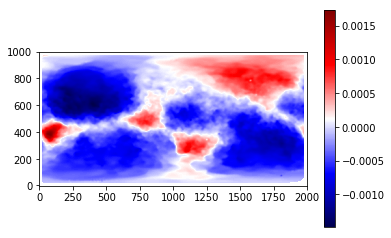

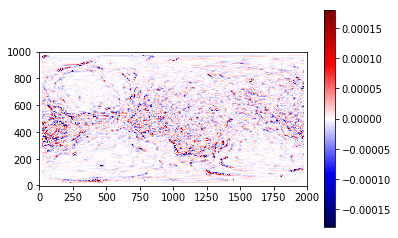

{'aggregate_standard_sphericity': 0.6821860385652285,
 'a/b': 1.3856907204861875,
 'a/c': 1.7072022965495652,
 'b/c': 1.2320226088766557,
 'a^2/bc': 2.365654380321441,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 11.382873274777351,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.5283886770932618,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 1.2575849942329047,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 6.014581351179849,
 'roughness_distance': array([[4.73591482e+00, 2.68466313e+00, 1.00548454e-03, 4.72936818e+00,
         2.76195692e+00],
        [4.72674117e+00, 2.68619460e+00, 1.00334032e-03, 4.72274675e+00,
         2.76325941e+00],
        [4.73600197e+00, 2.68624459e+00, 1.00435219e-03, 4.72943109e+00,
         2.76333176e+00],
        ...,
        [3.45505378e+00, 7.89225527e-01, 9.74051164e-04, 3.56375523e+00,
         5.51763003e-01],
        [3.44730044e+00, 7.91396098e-01, 9.76866515e-04, 3.55385691e+00,
         

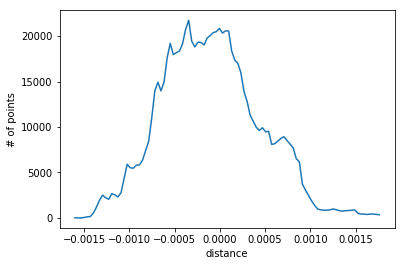

In [15]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.0018, sigma=5)

Aggregate standard sphericity =  0.6821860385652285
Bounding box and ellispoids ratios :
a/b = 1.3856907204861875
a/c = 1.7072022965495652
b/c = 1.2320226088766557
a^2/bc = 2.365654380321441
Bounding ellipsoid surface / Included ellipsoid surface = 11.382873274777351
Aggregate tomographed surface / Bounding ellipsoid surface = 0.5283886770932618
Aggregate tomographed surface / Middle ellipsoid surface = 1.2575849942329047
Aggregate tomographed surface / Included ellipsoid surface = 6.014581351179849
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.0004417657787007853
 
data min max
theta 0.00021019514348568505 6.283155368442306
phi 0.0011546089248821486 3.1407815598394215
alpha 0.0002912654558723831 6.283143821349165
beta 0.0007934570846738053 3.1411167446086865
distance -0.0016172277746293773 0.0017772275187891524


C:\Users\dschmidt\Documents\Cuttings\plot.py:221: RuntimeWarning: invalid value encountered in less
  zi[(zi<zmin) | (zi>zmax)] = None
C:\Users\dschmidt\Documents\Cuttings\plot.py:221: RuntimeWarning: invalid value encountered in greater
  zi[(zi<zmin) | (zi>zmax)] = None


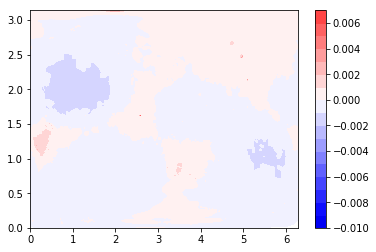

{'aggregate_standard_sphericity': 0.6821860385652285,
 'a/b': 1.3856907204861875,
 'a/c': 1.7072022965495652,
 'b/c': 1.2320226088766557,
 'a^2/bc': 2.365654380321441,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 11.382873274777351,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.5283886770932618,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 1.2575849942329047,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 6.014581351179849,
 'roughness_distance': array([[4.73591482e+00, 2.68466313e+00, 1.00548454e-03, 4.72936818e+00,
         2.76195692e+00],
        [4.72674117e+00, 2.68619460e+00, 1.00334032e-03, 4.72274675e+00,
         2.76325941e+00],
        [4.73600197e+00, 2.68624459e+00, 1.00435219e-03, 4.72943109e+00,
         2.76333176e+00],
        ...,
        [3.45505378e+00, 7.89225527e-01, 9.74051164e-04, 3.56375523e+00,
         5.51763003e-01],
        [3.44730044e+00, 7.91396098e-01, 9.76866515e-04, 3.55385691e+00,
         

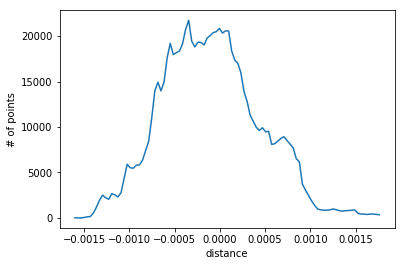

In [22]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.018)